# 송인욱
## 인플레이션으로 인한 환률 변동과 수출중심사업 분석

자료 출처  
https://www.index.go.kr/main.do?cate=1  
https://kosis.kr/index/index.do  
https://www.data.go.kr/data/15051116/fileData.do

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

In [41]:
if platform.system() == 'Windows':
    plt.rc('font', family='malgun gothic')
else:
    plt.rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [42]:
DIR = './Data_Inuk/'
CPI = 'CPI_19~22.5.csv'
RATE = '금리_19~22.5.csv'
EXCHANGE = '환율_19~22.5.csv'
EX_YEAR = '환율.csv'
EIPI = '수출입동향_19~22.5.csv'
CAR = '국내_세계_자동차생산량.csv'
KOSPI = '코스피.csv'
HYDCAR = '현대차.csv'

In [43]:
cpi = pd.read_csv(DIR + CPI, encoding='utf-8').T
kor_rate = pd.read_csv(DIR + RATE, encoding='utf-8').T
exchange = pd.read_csv(DIR + EXCHANGE, encoding='utf-8').T
exchange_year = pd.read_csv(DIR + EX_YEAR, encoding='utf-8').T
eipi = pd.read_csv(DIR + EIPI, encoding='utf-8').T
car = pd.read_csv(DIR + CAR, encoding='utf-8')
kospi = pd.read_csv(DIR + KOSPI, encoding='utf-8')
hdcar = pd.read_csv(DIR + HYDCAR, encoding='utf-8')

In [44]:
def set_kosis_one_df(df: pd.DataFrame):
    """통계청 인덱스1개 자료 전처리 함수

    Args:
        df (pd.DataFrame): 데이터프레임

    Returns:
        pd.DataFrame: 전처리 데이터프레임
    """
    try:
        df = df.reset_index()
        df.columns = df.iloc[0]
        df = df.rename(columns= {'Unnamed: 0': '날짜'}).drop(0)
        df = df.drop(['출처:', '주석:'], axis=1)
    except Exception:
        pass
    return df

In [45]:
df_list = [cpi, kor_rate, eipi, exchange, exchange_year]
set_df_list = []

for df in df_list:
    df = set_kosis_one_df(df)
    set_df_list.append(df)
cpi, kor_rate, eipi, exchange, exchange_year = set_df_list

In [46]:
def nor_columns(df:pd.DataFrame):
    """첫번째컬럼 제외하고 정규화해주는 함수

    Args:
        df (pd.DataFrame): 정규화시킬 데이터프레임

    Returns:
        pd.DataFrame: 정규화 데이터프레임
    """
    nor_df = df.copy()
    for i in nor_df.columns[1:]:
        nor_df[i] = nor_df[i].apply(lambda x: (x - nor_df[i].mean()) / nor_df[i].std())
        # nor_df[i] = nor_df[i].apply(lambda x: (x - nor_df[i].min()) / (nor_df[i].max() - nor_df[i].min()))
    return nor_df

In [47]:
def investing_to_date(df:pd.DataFrame):
    """인베스팅 날짜 변경해주는 함수

    Args:
        df (pd.DataFrame): 인베스팅 주가 데이터
    
    Returns:
        df
    """
    df1 = df.copy()
    df1['날짜'] = df1['날짜'].apply(lambda x: x.replace('년 ', '-'))
    df1['날짜'] = df1['날짜'].apply(lambda x: x.replace('월', ''))
    df1['날짜'] = pd.to_datetime(df1['날짜'], format='%Y-%m')
    df1 = df1.sort_values(by='날짜')
    return df1

In [48]:
def investing_rm_per(df):
    """인베스팅 변화율 변경해주는 함수

    Args:
        df (_type_): 인베스팅 주가 데이터

    Returns:
        df: _description_
    """
    result = df.copy()
    result['변동 %'] = result['변동 %'].apply(lambda x: float(x.replace('%', '')))
    return result

******************
### <span style='color:Blue'>금리 변화와 환률</span>

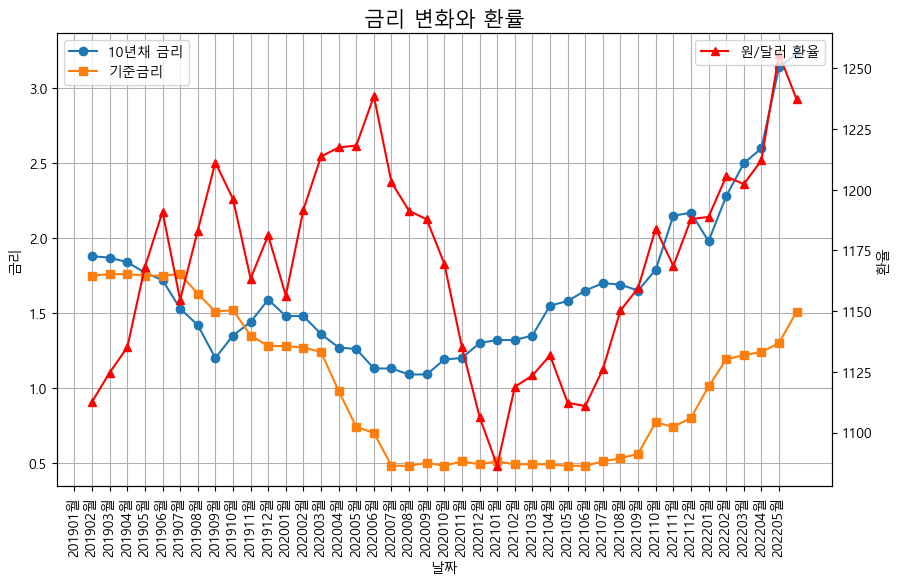

In [49]:
fig, ax1 = plt.subplots(figsize=(10,6), dpi=100)
ax1.plot(kor_rate.iloc[:,2], label='10년채 금리', marker='o')
ax1.plot(kor_rate.iloc[:,6], label='기준금리', marker='s')
plt.xlabel('날짜')
plt.ylabel('금리')
plt.legend(loc=2)
plt.xticks(range(kor_rate.shape[0]),kor_rate['날짜'], rotation=90)
plt.grid(True)
ax2 = ax1.twinx()
ax2.plot(exchange['원/달러'], label='원/달러 환율', color='red', marker='^')
plt.legend(loc=1)
plt.ylabel('환율')


plt.title('금리 변화와 환률', fontsize=15)
plt.show()

- 무제한 양적완화 이후로 달러의 가치가 많이 떨어졌다가 10년물 금리가 올라가면서 환율이 올라가는 모습을 볼 수 있음.
- 기준금리는 21년 9월까지 올리지못하지만 국채금리는 서서히 올라가고 환율이 올라감
- 시장은 금리 인상의 필요성을 수치로 보여줬지만, 계속 양적완화를 하면서 인플레이션의 가속을 부추겼다고 볼 수 있음.

### <span style='color:Blue'>소비자 물가지수와 환률</span>

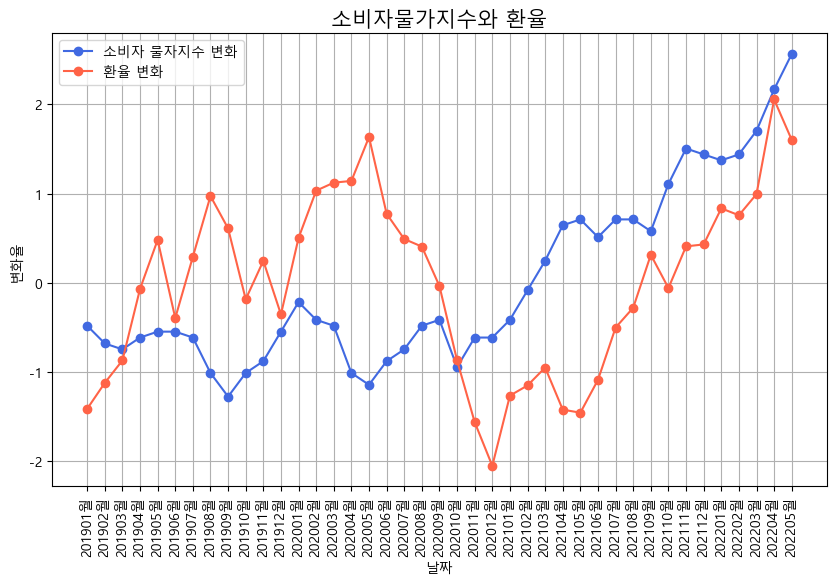

In [50]:
aa = nor_columns(cpi)
bb = nor_columns(exchange)

plt.figure(figsize=(10,6), dpi=100)
plt.plot(aa.iloc[:,0], aa.iloc[:,1], label= '소비자 물자지수 변화', marker='o', color='royalblue')
plt.plot(bb.iloc[:,0], bb.iloc[:,1], label= '환율 변화', marker='o', color='tomato')
plt.xticks(range(kor_rate.shape[0]),kor_rate['날짜'], rotation=90)
plt.grid(True)
plt.xlabel('날짜')
plt.ylabel('변화율')
plt.title('소비자물가지수와 환율', fontsize=15)
plt.legend(loc=2)
plt.show()

- 소비자 물가지수가 올라가면서 환율도 올라감
- 우리나라가 수입 의존도가 높은 나라이기때문에 환율의 급격한 상승은 물가를 상승시키고 소비심리를 위축
- 제조업위주의 국가 gdp = 경기 악화

### <span style='color:Blue'>현대차의 코스피 대비 변동율과 환율</span>

In [51]:
hd_ap = investing_rm_per(investing_to_date(hdcar))['변동 %'] - investing_rm_per(investing_to_date(kospi))['변동 %']
hd_ap.reset_index(drop=1)

0      0.75
1     -8.95
2     -0.49
3      3.63
4     -1.27
       ... 
199   -2.42
200   -1.80
201    7.20
202   -1.58
203    2.03
Name: 변동 %, Length: 204, dtype: float64

In [52]:
ex_nor = nor_columns(exchange_year)
year_list = []
for i in range(2005,2022):
    year_list.append(str(i) + '년')

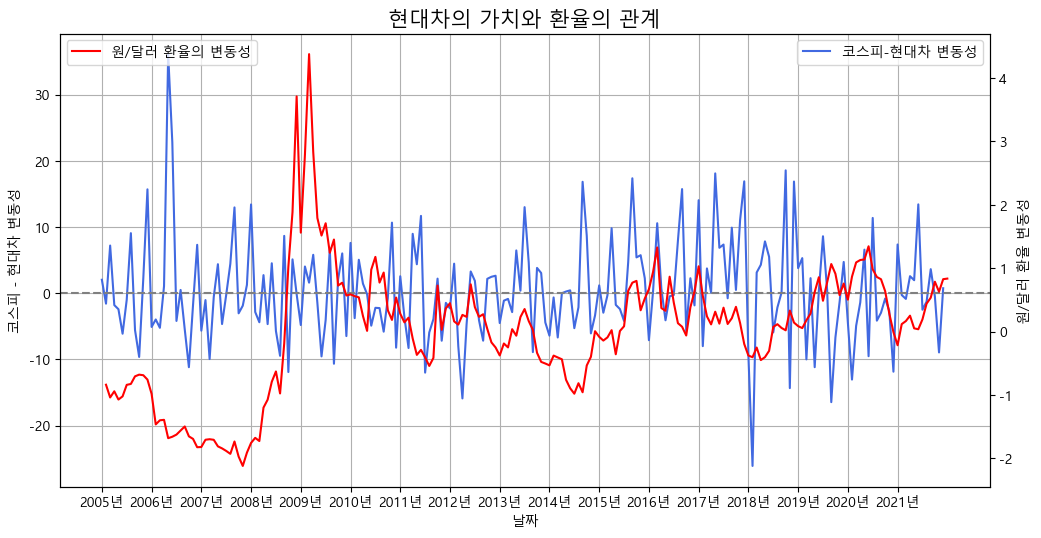

In [53]:
fig, ax1 = plt.subplots(figsize=(12,6), dpi=100)
ax1.plot(hd_ap, color='royalblue', label='코스피-현대차 변동성')
plt.title('현대차의 가치와 환율의 관계', fontsize=15)
plt.xlabel('날짜')
plt.ylabel('코스피 - 현대차 변동성')
plt.legend(loc=1)
plt.axhline(0, color='grey', linestyle='--')
plt.xticks(range(0,204,12), year_list)
plt.grid(True)
ax2 = ax1.twinx()
ax2.plot(ex_nor['원/달러'], color='red', label='원/달러 환율의 변동성')
plt.ylabel('원/달러 환율 변동성')
plt.legend(loc=2)

plt.show()

- 대표적인 환율 수혜주라고 불리는 현대차의 데이터를 분석.
- 그냥 주가데이터만 가져오면 분석하기 어렵기 때문에 현대차 변동폭에서 코스피지수 변동폭을 뺀 데이터 추출
- 2014년 이전에는 환율이 낮아지면 주춤하고 환율이 올라가면 복구하는 경향
- 2014년 이후에는 오히려 환율이 낮아져도 주가가 떨어지지않고 환율이 올라도 주가가 오르지 않음
- 2014~15년, 2018년, 2020년

### <span style='color:Blue'>한국과 전세계 자동차 생산량 비교</span>

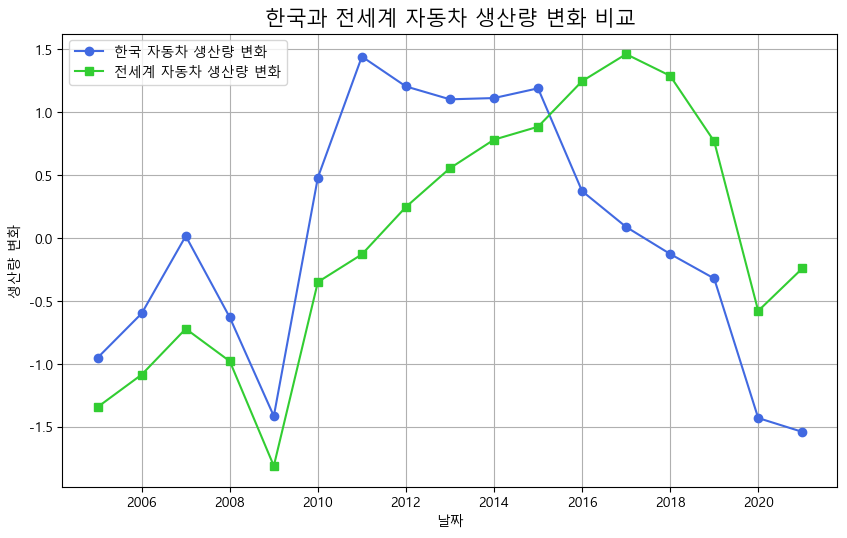

In [54]:
aa = nor_columns(car)
plt.figure(figsize=(10,6), dpi=100)
plt.plot(aa.iloc[:,0], aa.iloc[:,1], label= '한국 자동차 생산량 변화', marker='o', color='royalblue')
plt.plot(aa.iloc[:,0], aa.iloc[:,2], label= '전세계 자동차 생산량 변화', marker='s', color='limegreen')
plt.grid(True)
plt.xlabel('날짜')
plt.ylabel('생산량 변화')
plt.title('한국과 전세계 자동차 생산량 변화 비교', fontsize=15)
plt.legend(loc=2)
plt.show()

- 이유를 알아보기위하여 한국의 자동차 생산량 데이터와 전세계 생산량데이터 비교
- 국내 자동차 생산량은 2011년에 고점을찍고 지속적으로 하락
- 반면에 전세계 자동차 생산량은 2010년부터 꾸준히 증가함
- 국내 자동차생산 기업들이 국내공장보다는 해외공장으로 많이 이전함을 알 수 있음

- 운송, 국내 생산이 많은 수출 품목